<a id='top'></a>

# Homework 5: Bootstrap, Hypothesis Testing and Regression
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday April 19**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [15 points] Problem 1 - Hypothesis Testing Whether your Co-worker is a Doofus 

You are working as a Data Scientist for an internet-based hedgehog deliver company. Your co-worker, Daley Jennanigans, is a lovable scamp! Unfortunately, Daley also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's hedgehog-loving customers. In each case, clearly explain why Daley's hypothesis testing setup or conclusion is incorrect.

**Part A**: Daley has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought a hedgehog. Let $X$ be the random variable describing the number of website visitors who bought a hedgehog in the previous month, and suppose that the population proportion of visitors who bought a hedgehog is $p$. Daley is interested to see if the data suggests that more than 20% of website visitors actually buy a hedgehog.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$. 

#### 1.A.

The null hypothesis should make a statement about a parameter, in our case it is the population proportion. The null hypothesis should always be the control or status quo as well, indicating that there is no change. The null hypothesis should instead be $H_{0} : p = 0.20$, or that the amount of visitors who bought a hedgehog is $20\%$. The alternative hypothesis would be what Daley is testing, or researching. $H_{a} : p > 0.20$.

**Part B**: Daley decides instead to do his hypothesis test with a null hypothesis of $H_0: p < 0.20$.  

#### 1.B.
The null hypothesis should say that there is no change in the amount of people visiting the website. This null hypothesis says that Daley is testing whether 20% (or a greater value) of website visitors bought a hedgehog, but it is also giving the implication that the norm is less |than $20$ percent of visitors that bought a hedgehog.

**Part C**: Now Daley is finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$. Daley computes for the sample proportion a normalized test-statistic of $z = 2.4$ and states that since $z = 2.4 > 0.01$ there is insufficient statistical evidence at the $\alpha = 0.01$ significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

#### 1.C.
This would not work either. Daley starts off by comparing his Z-test statistic to the normal distribution, but he is implying that $0.01$ on the normal distribution is the same as $\alpha = 0.01$ and this is not the case. $Z_{\alpha} \ne \alpha$.

In [2]:
z_alpha = 0.01
print('ppf = {}'.format(stats.norm.ppf(1 - z_alpha)))

ppf = 2.3263478740408408


**Part D**: Daley is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$, and found the test-statistic $z=2.4$. Daley computes his p-value as:
$$\text{p-value} = \texttt{stats.norm.cdf(2.4)} = 0.9918$$

Since his p-value (0.9918) is greater than the significance level (0.01), Daley again claims that there is insufficient evidence at the 1% significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

#### 1.D
Daley is wrong again. His misunderstanding comes from thinking that he should use $0.9918$ as a value to compare to $0.01$ When running the software, he is calculating the total probability up to $2.4$ when in fact he should be doing the $0.01$ compared to $1-0.9918$. In other words, Daley's null hypothesis would be the same, however his alternative hypothesis is saying $H_a: p < 0.20$. Furthermore, suppose we plotted on a normal distribution, the 'colored in' part would be everything left of that p-value instead of everything that is to the right of it (what we are actually researching!). The values to the right tail give evidence against the null hypothesis.
$$\text{p-value} = \texttt{1 - stats.norm.cdf(2.4)} = 0.008198$$

In [3]:
z_test=0.9918
print('p-value > : {}'.format(1 - stats.norm.cdf(z_test))) # prob greater than p-val
print('p-value < : {}'.format(stats.norm.cdf(z_test))) # prob less than p-val

p-value > : 0.16064754883695664
p-value < : 0.8393524511630434


**Part E**: Daley is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. Suppose he computes a p-value of $0.03$, and then concludes that there is only a 3% probability that the null hypothesis is true. 

#### 1.E.
This is wrong because p-value is the measure of strength of the evidence against the null hypothesis that is provided by the sample data. The p-value is the probability of getting the observed value of the test statsistic, or a value with even greater evidence against $H_0$ if the null hypothesis is true. So the p-value is a probability and it is calculated on the null hypothesis is true.

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [25 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be approximately normally distributed. The mean reaction times (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean (ms)} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Set up your calculations by hand, and report the results in Markdown/MathJax. Of course, you can and should use Python as a calculator.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

#### 2|.A.
Wow, thats actually a lot less adults than I thought. I would have guessed around the $90\%$ of american adults drink coffee. Anyways$\ldots$

To find the value for the statistic, I used a python function from the library.

$$
\texttt{stats.t.ppf(1 - (1-0.95)/2, df=9)} = 2.262
$$

This value is important because it is the absolute value of the range of the scores. In other words, our math formula looks like this:

$$
{-2.262} \lt t \lt 2.262 \\
{-2.262} \lt \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}} \lt 2.262 \\
$$

Now we have to plug in our values, do some math, and calculate these things.

Coffee + Nap:
$$
{-2.262} \lt \frac{451.3 - \mu}{\frac{31.9}{\sqrt{10}}} \lt 2.262 \\
{-2.262} \left( \frac{31.9}{\sqrt{10}} \right) + 451.3 \lt \mu \lt {2.262} \left( \frac{31.9}{\sqrt{10}} \right) + 451.3 \\
428.4801 \lt \mu \lt 474.1199
$$

Coffee:
$$
{-2.262} \lt \frac{494.2 - \mu}{\frac{39.6}{\sqrt{10}}} \lt 2.262 \\
{-2.262} \left( \frac{39.6}{\sqrt{10}} \right) + 494.2 \lt \mu \lt {2.262} \left( \frac{39.6}{\sqrt{10}} \right) + 494.2 \\
465.8719 \lt \mu \lt 522.5281
$$

Nap:
$$
{-2.262} \lt \frac{492.8 - \mu}{\frac{45.2}{\sqrt{10}}} \lt 2.262 \\
{-2.262} \left( \frac{45.2}{\sqrt{10}} \right) + 492.8 \lt \mu \lt {2.262} \left( \frac{45.2}{\sqrt{10}} \right) + 492.8 \\
460.4659 \lt \mu \lt 525.1341
$$

#### Other Words:
1. Conclusions: It seems that drinking coffee and taking a nap have a much improved reaction times. However, there doesnt seem to be much difference between taking a coffee or drinking a nap.

2. The reason we use the t-distribution is because we have the estimated standard deviation of the sampling distribution of the sample mean. The test statistic does NOT have the standard normal distribution. It has a t-distribution with $n-1$ degrees of freedom.

In [4]:
stats.t.ppf(1 - (1-0.95)/2, df=9)

2.2621571627409915

In [5]:
def get_mci():
    n = 10
    m1 = 451.3; s1 = 31.9 # coffee + nap
    m2 = 494.2; s2 = 39.6 # coffee
    m3 = 492.8; s3 = 45.2 # nap
    print('Coffee + Nap: {}'.format(mean_confidence_interval(n, m1, s1)))
    print('Coffee: {}'.format(mean_confidence_interval(n, m2, s2)))
    print('Nap: {}'.format(mean_confidence_interval(n, m3, s3)))
    
def mean_confidence_interval(n, m, s, conf=0.95):
    return stats.t.interval(
        alpha=conf, # confidence interval
        df=n-1, # degrees of freedom, n-1
        loc=m, # mean
        scale= (s/(n**(1/2))) # std err
    )

get_mci()

Coffee + Nap: (428.48011470011295, 474.1198852998871)
Coffee: (465.8718665242781, 522.5281334757218)
Nap: (460.46586785094377, 525.1341321490563)


**Part B**: Use a **rejection region hypothesis test** to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Note** that the number of degrees of freedom for a two-sample t-test is $df_1 + df_2 = (n_1-1) + (n_2-1) = n_1 + n_2 - 2$ 
(where $n_1$ and $n_2$ are the number of data points from each of the two samples). All other mechanics are the same as the two-sample z-tests we know and love.

#### 2.B.
Suppose $H_{0}$ is our null hypothesis that says that taking a nap yeilds the same reaction time as drinking coffee, and $H+{a}$ is our alternative hypothesis that claims taking a nap promotes faster reaction times than drinking coffee. In mathematical terms:

$$
H_{0}: \mu_{n} = \mu_{c}\\
H_{a}: \mu_{n} < \mu_{c}\\
$$

To test this, we use:

$$
T = \frac{\bar{X_n} - \bar{X_c}}{\sqrt{\frac{S_n^2}{n_n} + \frac{S_c^2}{n_c}}}
$$

Math calculated below. Based on the data, you cannot conclude with a $0.05$ significance level that taking a nap yeilds better results than drinking coffee.

In [56]:
# normally i dont do math like this but its late and im too tired to make it look nice
def twosampttest():
    a=0.05
    xd=492.8-494.2
    s1=(45.2**2)/10
    s2=(39.6**2)/10
    sd= (s1+s2)**(1/2)
    tval = xd / sd
    print('tval: {:0.3f}'.format(tval))
    
    talp=stats.t.ppf(
        q=a,
        df=18
    )
    
    pval = stats.t.cdf(tval, 18)
    print('pval: {:0.3f}'.format(pval))    
    print('talp: {:0.3f}'.format(talp))
    # found a neat way to write single line if elses
    print("Reject Null Hypothesis") if(tval < talp) else print("Accept Null Hypothesis")

twosampttest()

tval: -0.074
pval: 0.471
talp: -1.734
Accept Null Hypothesis


EXPLINATIONS:
* Since our T-test statistic is not less than our t-alpha value, we can not reject the null hypothesis with 95% confidence. Therefore, we can not conlcude that either taking a nap or drinking coffee will improve reaction times.

**Part C**: Perform an appropriate hypothesis test (you may use either p-values or rejection region) to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap. So, there should be two separate hypothesis tests, but they are seeking to show similar results (one for coffee-nap versus coffee-only, and one for coffee-nap versus nap-only). Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

#### 2.C.

First Test:
Suppose $H_{0}$ is our null hypothesis that says that taking a coffee-nap yeilds the same reaction time as drinking coffee, and $H+{a}$ is our alternative hypothesis that claims taking a coffee-nap promotes faster reaction times than drinking coffee. In mathematical terms:

$$
H_{0}: \mu_{cn} = \mu_{c} \\
H_{a}: \mu_{cn} < \mu_{c} \\
$$

Second Test:
Suppose $H_{0}$ is our null hypothesis that says that taking a coffee-nap yeilds the same reaction time as taking a nap, and $H+{a}$ is our alternative hypothesis that claims taking a coffee-nap promotes faster reaction times than taking a nap. In mathematical terms:

$$
H_{0}: \mu_{cn} = \mu_{n} \\
H_{a}: \mu_{cn} < \mu_{n} \\
$$


Math calculated below. In both cases, you can reject the null hypothesis. Taking a coffee-nap does yeild better results.

In [59]:
def coffnap_coff():
    print("Coffee-Nap vs. Coffee: ")
    
    # alpha val
    a=0.05
    
    # find  tval
    xd=451.3-494.2
    s1=31.9**2/10
    s2=39.6**2/10
    sd= (s1+s2)**(1/2)
    tval = xd / sd
    print('tval: {:0.3f}'.format(tval))
    
    ## find t alpha
    talp=stats.t.ppf(
        q=a,
        df=18
    )
    print('talp: {:0.3f}'.format(talp))
    
    ## find t pval
    pval = stats.t.cdf(
        x=tval,
        df=18
    )
    print('pval: {:0.3f}'.format(pval))
    
    # found a neat way to write single line if elses
    print("Reject Null Hypothesis") if(talp < pval) else print("Accept Null Hypothesis")

In [63]:
def coffnap_nap():
    print("Coffee-Nap vs. Nap: ")
    
    # alpha val
    a=0.05
    
    # find  tval
    xd=451.3-492.8
    s1=31.9**2/10
    s2=45.2**2/10
    sd= (s1+s2)**(1/2)
    tval = xd / sd
    print('tval: {:0.3f}'.format(tval))
    
    ## Find t alpha
    talp=stats.t.ppf(
        q=a,
        df=18
    )
    print('talp: {:0.3f}'.format(talp))
    
    ## find t pval
    pval = stats.t.cdf(
        x=tval,
        df=18
    )
    print('pval: {:0.3f}'.format(pval))
    
    
    # found a neat way to write single line if elses
    print("Reject Null Hypothesis") if(talp < pval) else print("Accept Null Hypothesis")

In [64]:
coffnap_coff()
coffnap_nap()

Coffee-Nap vs. Coffee: 
tval: -2.668
talp: -1.734
pval: 0.008
Reject Null Hypothesis
Coffee-Nap vs. Nap: 
tval: -2.372
talp: -1.734
pval: 0.015
Reject Null Hypothesis


EXPLINATIONS:
* In both cases, wefound that taking a coffee-nap is will improve reaction times more than just drinking coffee or taking a nap.

1. Coffee-Nap vs Coffee:
    * Since the T-alpha value is less than the p-value, we can reject the null hypothesis that taking a coffee-nap is the same as drinking coffee with 95% confidence.
    * -1.734 < 0.008 -> REJECT NULL HYPOTHESIS
2. Coffee-Nap vs Nap:
    * Since the T-alpha value is less than the p-value, we can reject the null hypothesis that taking a coffee-nap is the same as taking a nap with 95% confidence.
    * -1.734 < 0.015 -> REJECT NULL HYPOTHESIS

**Part D:** Is there sufficient evidence at the 95% confidence (5% significance) level to support claim that the reaction time after a coffee-nap is at least 20 ms faster than the reaction time after a coffee only? Fully justify your answer and show all work demonstrating this conclusion using a **p-value hypothesis test**. 

**Part E**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

#### 2.E.

Chi squared formula:
$$
P\left(\frac{\left(n-1\right)s^{2}}{\chi^2_{\frac{\alpha}{2}}} \le \sigma^{2} \le \frac{\left(n-1\right)s^{2}}{\chi^2_{1-\frac{\alpha}{2}}} \right) = 1 - \alpha \\
\left(\frac{\left(n-1\right)s^{2}}{\chi^2_{\frac{\alpha}{2}}} , \frac{\left(n-1\right)s^{2}}{\chi^2_{1-\frac{\alpha}{2}}} \right)
$$

In [8]:
def stdintvl():
    alpha=0.05/2 # half cus split
    n=10
    s=31.9**2
    chival = stats.chi2.ppf(0.025, 9)
    print('chi val = {}'.format(chival))
stdintvl()

chi val = 2.7003894999803584


<br>

---
[Back to top](#top)
<a id='p3'></a>

### [40 points] Problem 3 - Simple Linear Regression for Science!

From [Google Trends](https://trends.google.com/trends/?geo=US) data, it appears that interest in "science" in the United States has been waning since about 2004. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `science_interest.csv` into a Pandas DataFrame. Create two new columns:
* `year` should be the year associated with that data point, and
* `month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "science" has evolved over time. Label only the data point associated with January of each even year, and label with the year (and of course be sure to label your axes).

In [121]:
science_interest_path = 'science_interest.csv'

dfSI = pd.read_csv(
        science_interest_path,
        header=None,
        skiprows=3,
        names=['Date', 'interest']
    )

dfSI.head()

colors3=['orange', 'purple','gold']

In [170]:
def get_clean_dfSI():
    # copyover df to new one
    dfSI1 = dfSI.copy()

    # dropping null value columns to avoid errors 
    dfSI1.dropna(inplace = True)

    # new data frame with split value columns 
    new = dfSI1["Date"].str.split(
        "-",
        n=1,
        expand=True
    )

    # making seperate first year column from new data frame 
    dfSI1['year']= new[0]

    # making seperate month num column from new data frame 
    dfSI1['month']= new[1]
    
    # make the new columns numerics
    dfSI1['month']=pd.to_numeric(dfSI1['month'])
    dfSI1['year']=pd.to_numeric(dfSI1['year'])
    dfSI1['interest']=pd.to_numeric(dfSI1['interest'])
    
    dfSI1.to_csv(r'science_interest_CLEAN.csv')
    
    return dfSI1

In [291]:
def graph2A():
    # copy over clean df to new one
    dfSI1 = get_clean_dfSI()

    indxlbl = dfSI1.index[((dfSI1['month']==1) & (dfSI1['year']%2==0))]

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )

    plt.scatter(
        range(len(dfSI1['Date'])),
        dfSI1['interest'],
        color=colors3[2],
        edgecolors=colors3[0],
        alpha=0.75,
        label='Interest Point'
    )

    ax.set_xlabel(
        "Time per Month",
        fontsize=16,
        color=colors3[1]
    )
    
    ax.set_xticks(indxlbl)
    
    ax.set_xticklabels(
        dfSI1.loc[indxlbl, 'year']
    )

    ax.set_ylabel(
        "Interest in Science",
        fontsize=16,
        color=colors3[1]
    )

    ax.set_title(
        "Scatter Plot of the Interest in Science Over Time per Month",
        fontsize=24,
        color=colors3[1]
    )
    
    ax.grid(
        alpha=0.1,
        color=colors3[1]
    )
    
    ax.set_axisbelow(
        True
    )

    plt.legend()

    plt.show()

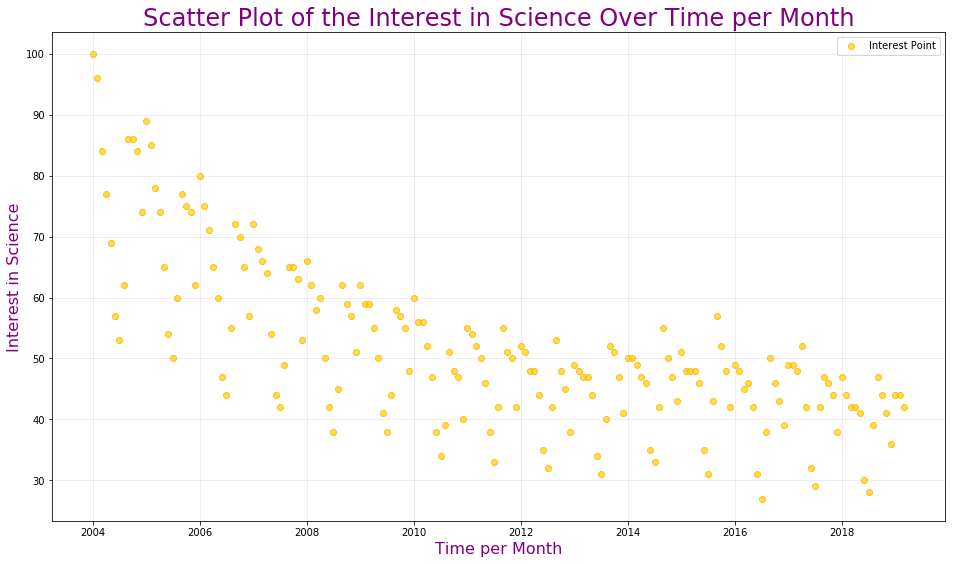

In [292]:
graph2A()

**Part B:** These data (and the sea-level data from Homework 4) are a **time series**, where the independent variable is *time* and the dependent quantity is interest in science. One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in science, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of even years, and be sure to label your axes.

In [286]:
def graph2B():
    # copy over clean df to new one
    dfSI1 = get_clean_dfSI()

    indxlbl = dfSI1.index[((dfSI1['month']==1) & (dfSI1['year']%2==0))]

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )
    
    plt.plot(
        range(len(dfSI1['Date'])),
        dfSI['interest'],
        color=colors3[2],
        label='Interest',
        alpha=0.75,
        lw=3
    )

    ax.set_xlabel(
        "Year",
        fontsize=16,
        color=colors3[1]
    )
    
    ax.set_xticks(indxlbl)
    
    ax.set_xticklabels(dfSI1.loc[indxlbl, 'year'])

    ax.set_ylabel(
        "Interest in Science",
        fontsize=16,
        color=colors3[1]
    )

    ax.set_title(
        "Line Plot of the Interest in Science over Time",
        fontsize=24,
        color=colors3[1]
    )
    
    ax.grid(
        alpha=0.1,
        color=colors3[1]
    )
    
    ax.set_axisbelow(
        True
    )

    plt.legend()
    plt.show()

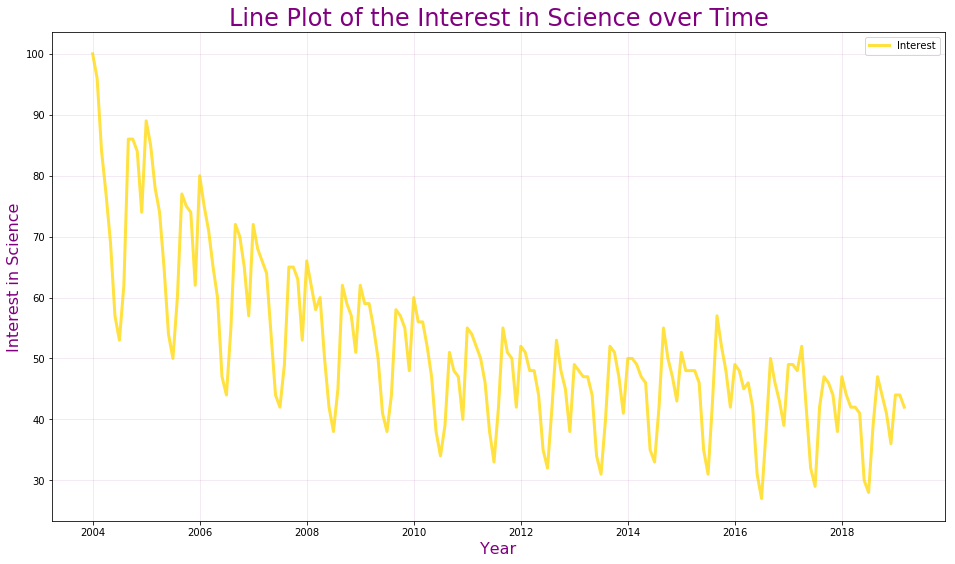

In [287]:
graph2B()

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in science? During which months is interest in science highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in science for each month. So, compute 12 values and report them in a table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists, dammit.

What do you think accounts for the drop(s) in interest in science during those month(s)? Recall that these data are from the United States.

#### 3.C.
(math calculations below)

* It seems as though interest in science peaks in January and is fairly popular in September.
* The lowest interest in science is in July.

Maybe since students are out of school in July they are less inclined to learn science.

In September and January students are just coming off a break. They are excited to go back to school. They are learning consistently about various fields of the sciences. Learning and doing experiments must pique the interest of students. During the Summer months, students are out of class. They aren't in class everyday learning about the universe.

In [253]:
def C3func():
    # copy over clean df to new one
    dfSI1 = get_clean_dfSI()
    
    dfSI1.drop(
        columns=['Date'],
        inplace=True
    )
    
    dfSI1.drop(
        columns=['year'],
        inplace=True
    )
    
    dfSI1=dfSI1.groupby('month').mean()
    
    dfSI1.to_csv(r'C3func.csv')
    
    sidf = 'C3func.csv'

    dfSI1 = pd.read_csv(
        sidf,
        header=None,
        skiprows=1,
        names=['month', 'interest']
    )
    
    
    return(dfSI1)

In [254]:
C3func()

,month,interest
0,1,60.937500
1,2,58.562500
2,3,55.812500
3,4,55.133333
4,5,49.733333
5,6,39.533333
6,7,36.200000
7,8,45.466667
8,9,59.133333
9,10,56.533333


**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in science. Create a new Pandas DataFrame that consists only of two columns:
* `year`, and
* `interest`, the mean interest in science from the twelve months in that year.

In [255]:
def D3func():
    # copy over clean df to new one
    dfSI1 = get_clean_dfSI()
    
    dfSI1.drop(
        columns=['Date'],
        inplace=True
    )
    
    dfSI1.drop(
        columns=['month'],
        inplace=True
    )
    
    dfSI1=dfSI1.groupby('year').mean()
    
    dfSI1.to_csv(r'D3func.csv')
    
    sidf = 'D3func.csv'

    dfSI1 = pd.read_csv(
        sidf,
        header=None,
        skiprows=1,
        names=['year', 'interest']
    )
    
    return(dfSI1)

In [256]:
D3func()

,year,interest
0,2004,77.333333
1,2005,70.250000
2,2006,63.416667
3,2007,58.750000
4,2008,54.166667
5,2009,52.166667
6,2010,47.333333
7,2011,47.333333
8,2012,44.666667
9,2013,44.250000


**Part E:** Perform a simple linear regression with `year` as the feature and `interest` as the response (mean annual interest in science).  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

Then make a scatter plot of the mean annual interest in science as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

In [316]:
def graph_3E():
    # copy over clean df to new one
    dfSI1 = D3func()
    
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )

    plt.scatter(
        dfSI1['year'],
        dfSI1['interest'],
        color=colors3[2],
        edgecolors=colors3[0],
        s=100,
        alpha=0.75,
        label='Interest Point'
    )
    
    # Linear Regress
    bhat, ahat, rval, pval, stderr = stats.linregress(dfSI1['year'], dfSI1['interest'])
    
    print("bhat: {}".format(bhat))
    print("ahat: {}".format(ahat))
    print("rval: {}".format(rval))
    print("pval: {}".format(pval))    
    print("stderr: {}".format(stderr))
    
    ax.plot(
        dfSI1['year'],
        ahat+bhat*dfSI1['year'],
        color=colors3[1],
        lw=3,
        label='Linregress',
        ls='-'
    )
    
    ax.set_xlabel(
        "Year",
        fontsize=16,
        color=colors3[1]
    )
        
    ax.set_ylabel(
        "Interest in Science",
        fontsize=16,
        color=colors3[1]
    )

    ax.set_title(
        "Scatter Plot of the Interest in Science Per Year",
        fontsize=24,
        color=colors3[1]
    )
    
    ax.grid(
        alpha=0.1,
        color=colors3[1]
    )
    
    ax.set_axisbelow(
        True
    )

    plt.legend()
    plt.show()

bhat: -2.0285539215686272
ahat: 4131.6601715686265
rval: -0.8869231508734774
pval: 4.677658267995901e-06
stderr: 0.2823582638934282


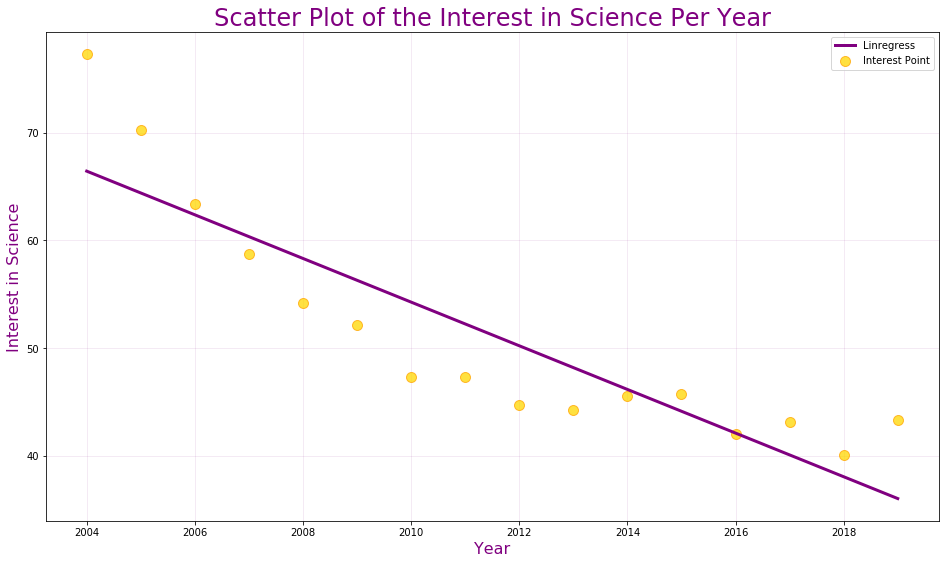

In [317]:
graph_3E()

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in science is positive or negative. Fully justify your responses.

#### 3.F.
My calculated $\hat{\beta}$ value is -2.029. $\hat{\beta}$ is the relationship of time and the interest in science. Since the gradient of the fitted regession line in the graph is negative, the relationship between time and science is negative.

**Part G**: What interest in science does your simple linear regression model predict in the year 2030? What about in 2050? What are potential drawbacks to this model for interest in science?

#### 3.G.

For the year 2030 the interest in science would be $13.696$, and for othe year 2050 the interest is ${-26.875}$. Of course, interest in science will never be negative. This is a drawback to assuming predictions.

In [322]:
bhat=-2.0285539215686272
ahat=4131.6601715686265
y1 = ahat + bhat*2030
print("2030 Interest: {:0.03f}".format(y1))
y2 = ahat + bhat*2050
print("2050 Interest: {:0.03f}".format(y2))

2030 Interest: 13.696
2050 Interest: -26.875


**Part H:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result. Why is this a confidence interval for $\beta$ and not for $\hat{\beta}$?

In [449]:
def H3Conf():
    # confidence
    conf=0.66
    print('conf: {:0.03f}'.format(conf)) if (verbose) else None
    
    # alpha
    alpha=1-conf
    print('alpha: {:0.03f}'.format(alpha)) if (verbose) else None
    
    # get the new data frame
    dfSI1 = D3func()
    
    # Linear Regress
    bhat, ahat, rval, pval, stderr = stats.linregress(dfSI1['year'], dfSI1['interest'])
    if(verbose):
        print("bhat: {:0.03f}".format(bhat))
        print("ahat: {:0.03f}".format(ahat))
        print("rval: {:0.03f}".format(rval))
        print("pval: {:0.03f}".format(pval))    
        print("stderr: {:0.03f}".format(stderr))
        
    x=dfSI1['year']
    xmean=x.mean()
    y=dfSI1['interest']
    ymean=y.mean()
    
    # calculate ybar
    ybar=ahat+bhat*x
    
    ns=len(ybar)
    print('ns: {:0.03f}'.format(ns)) if (verbose) else None
    
    tcrit = stats.t.ppf(1-alpha/2, df= (ns-2))
    print('tcrit: {:0.03f}'.format(tcrit)) if (verbose) else None
    
    SSE=np.sum((y-ybar)**2)
    print('SSE: {:0.03f}'.format(SSE)) if (verbose) else None
    SSX=np.sum((x-xmean)**2)
    print('SSX: {:0.03f}'.format(SSX)) if (verbose) else None
    
    sigmahat=(SSE/(len(ybar)-2))**(1/2)
    
    leftCI = bhat-tcrit * sigmahat/(SSX**(1/2))
    rightCI = bhat+tcrit * sigmahat/(SSX**(1/2))
    if(verbose):
        print("leftCI: {:0.03f}".format(leftCI))
        print("rightCI: {:0.03f}".format(rightCI))
    return leftCI, rightCI

In [450]:
verbose=True
H3Conf()

conf: 0.660
alpha: 0.340
bhat: -2.029
ahat: 4131.660
rval: -0.887
pval: 0.000
stderr: 0.282
ns: 16.000
tcrit: 0.988
SSE: 379.497
SSX: 340.000
leftCI: -2.307
rightCI: -1.750


(-2.3074770282745694, -1.7496308148626851)

**Part I:** What proportion of the variation in mean annual interest in science is explained by your linear regression model?

In [445]:
def I3R2():
    # confidence
    conf=0.66
    print('conf: {:0.03f}'.format(conf)) if (verbose) else None
    
    # alpha
    alpha=1-conf
    print('alpha: {:0.03f}'.format(alpha)) if (verbose) else None
    
    # get the new data frame
    dfSI1 = D3func()
    
    # Linear Regress
    bhat, ahat, rval, pval, stderr = stats.linregress(dfSI1['year'], dfSI1['interest'])
    if(verbose):
        print("bhat: {:0.03f}".format(bhat))
        print("ahat: {:0.03f}".format(ahat))
        print("rval: {:0.03f}".format(rval))
        print("pval: {:0.03f}".format(pval))    
        print("stderr: {:0.03f}".format(stderr))
        
    x=dfSI1['year']
    xmean=x.mean()
    y=dfSI1['interest']
    ymean=y.mean()
    
    # calculate ybar
    ybar=ahat+bhat*x
    
    ns=len(ybar)
    print('ns: {:0.03f}'.format(ns)) if (verbose) else None
    
    tcrit = stats.t.ppf(1-alpha/2, df= (ns-2))
    print('tcrit: {:0.03f}'.format(tcrit)) if (verbose) else None
    
    SSE=np.sum((y-ybar)**2)
    print('SSE: {:0.03f}'.format(SSE)) if (verbose) else None
    SSX=np.sum((x-xmean)**2)
    print('SSX: {:0.03f}'.format(SSX)) if (verbose) else None
    SST=np.sum((y-ymean)**2)
    print('SST: {:0.03f}'.format(SST)) if (verbose) else None
    
    R2=1-(SSE/SST)
    print('R2: {:0.03f}'.format(R2)) if (verbose) else None
    
    return R2

In [446]:
I3R2()

conf: 0.660
alpha: 0.340
bhat: -2.029
ahat: 4131.660
rval: -0.887
pval: 0.000
stderr: 0.282
ns: 16.000
tcrit: 0.988
SSE: 379.497
SSX: 340.000
SST: 1778.607
R2: 0.787


0.7866326755553352

**Part J:** Make a scatter plot of the residuals from this simple linear regression model, relative to the annual mean interest data (and be sure to label your axes). Make a conjecture about what kind of additional feature, also based on `year`, should be added to improve the fit of the model. Note that this new model with have your new feature _and_ `year`, making it a _multiple linear regression_ model.

In [530]:
def graph_3J():
    # copy over clean df to new one
    dfSI1 = D3func()
    
    # get the x and y values from the df
    x=dfSI1['year']
    y=dfSI1['interest']
    
    # get the regression value
    R2=I3R2()
    
    # Linear Regress
    bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
    
    # calculate ybar
    yhat=ahat+bhat*x
    
    # calculate res
    res=y-yhat
    
    # plots
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )
    
    # do the first scatter plot of the res
    plt.scatter(
        x,
        res,
        color=colors3[2],
        edgecolors=colors3[0],
        s=100,
        alpha=0.75,
        label='Interest Point'
    )
    
    ax.set_xlabel(
        "Year",
        fontsize=16,
        color=colors3[1]
    )
        
    ax.set_ylabel(
        "Residual Interest of Science",
        fontsize=16,
        color=colors3[1]
    )

    ax.set_title(
        "Scatter Plot of Residual Interest of Science Per Year",
        fontsize=24,
        color=colors3[1]
    )
    
    ax.grid(
        alpha=0.1,
        color=colors3[1]
    )
    
    ax.set_axisbelow(
        True
    )
    
    plt.legend()
    plt.show()

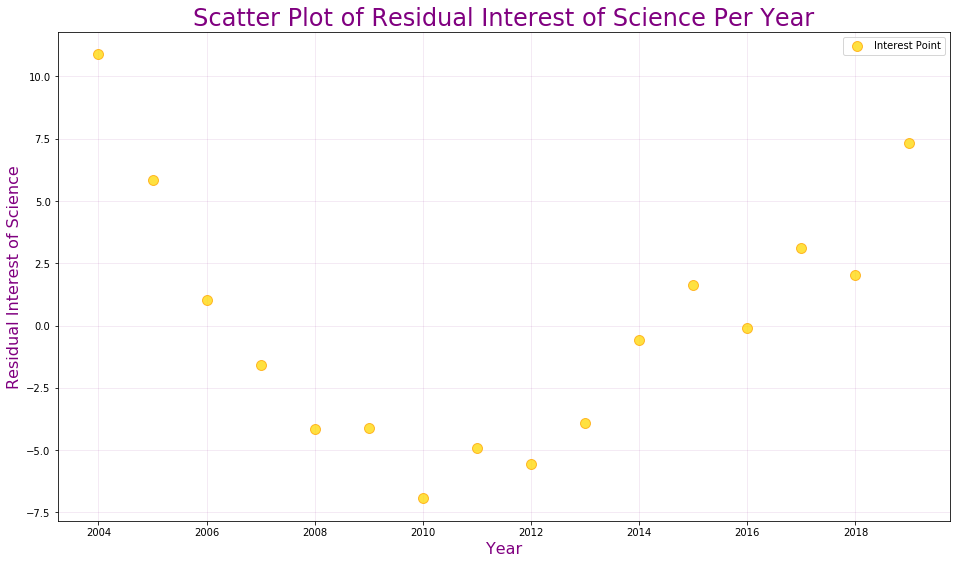

In [531]:
verbose = False
graph_3J()

#### 5.J.
This looks like a quadratic function. A formula that can explain this is:
$$
\text{residual interest} = \text{year}^2
$$

<br>

---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Choose-Your-Own Simple Linear Regression Adventure

The interest in science data from the previous problem was from [Google Trends](https://trends.google.com/trends/?geo=US). From that main page, you can enter a particular search term and view the interest in that term over time. By default, the data displayed will be weekly data for the past year. You can ask for different time periods or regions as well (my link above defaults to the United States).

**Part A:** Download data from Google Trends for a search term, region and time period of your choice. (Alternatively, you can also use data from whatever source you would like, as long as it is a time series.) Then:
* clearly state what your search term, region and time period are (or fully describe your other data set),
* load your data as a Pandas DataFrame, and
* make a plot of the data over the entire time frame. Be sure to label your axes clearly.

**NOTE:** be sure to **leave your plot cell executed** because you are not asked to host the data or provide the data set with the homework submission. If your plot is not readily visible when we open your notebook for grading, then you can earn a maximum of 10 points for this problem. 

### KUNG FU CINEMA IN THE US

* Search Term: Kung Fu Movies

* Time: Jan 1, 2004 - Present

How is the Kung Fu Cinema changing overtime in the US? Unfortunately, I wont be able to fully study the science because the golden age of Kung Fu films in the US was in the $60$s-$70$s. As a huge kung fu movie fan, this would be very interesting.

In [582]:
# file
kung_fu_path = 'kungfucinema.csv'

# put in data frame
dfKF = pd.read_csv(
        kung_fu_path,
        header=None,
        skiprows=3,
        names=['Date', 'interest']
    )

# theme colors
colors4=['orange','red','gold']

In [583]:
def get_clean_dfKF():
    # copyover df to new one
    dfKF1 = dfKF.copy()

    # dropping null value columns to avoid errors 
    dfKF1.dropna(inplace = True)

    # new data frame with split value columns 
    new = dfKF1["Date"].str.split(
        "-",
        n=1,
        expand=True
    )

    # making seperate first year column from new data frame 
    dfKF1['year']= new[0]

    # making seperate month num column from new data frame 
    dfKF1['month']= new[1]
    
    # make the new columns numerics
    dfKF1['month']=pd.to_numeric(dfKF1['month'])
    dfKF1['year']=pd.to_numeric(dfKF1['year'])
    dfKF1['interest']=pd.to_numeric(dfKF1['interest'])
    
    # write it to the clean dataframe for reference
    dfKF1.to_csv('kungfucinema_CLEAN.csv')
    
    return dfKF1

In [584]:
get_clean_dfKF().head()

,Date,interest,year,month
0,2004-01,19,2004,1
1,2004-02,12,2004,2
2,2004-03,14,2004,3
3,2004-04,22,2004,4
4,2004-05,24,2004,5


In [587]:
def graph4A_scatter():
    # copy over clean df to new one
    dfKF1 = get_clean_dfKF()
    
    # get the index labels
    indxlbl = dfKF1.index[((dfKF1['month']==1) & (dfKF1['year']%2==0))]

    # plot
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )
    
    # scatter plot of the values
    plt.scatter(
        range(len(dfKF1['Date'])),
        dfKF1['interest'],
        color=colors4[2],
        edgecolors=colors4[0],
        alpha=0.75,
        label='Interest Point'
    )
    
    # x label
    ax.set_xlabel(
        "Time per Month",
        fontsize=16,
        color=colors4[1]
    )
    
    # make the xtick the label
    ax.set_xticks(indxlbl)
    ax.set_xticklabels(
        dfKF1.loc[indxlbl, 'year']
    )
    
    # y label
    ax.set_ylabel(
        "Interest in Kung Fu Movies",
        fontsize=16,
        color=colors4[1]
    )
    
    # title
    ax.set_title(
        "Scatter Plot of the Interest in Kung Fu Movies Over Time per Month",
        fontsize=24,
        color=colors4[1]
    )
    
    # make the grid
    ax.grid(
        alpha=0.1,
        color=colors4[1]
    )
    
    # tony always has this
    ax.set_axisbelow(
        True
    )

    plt.legend()

    plt.show()

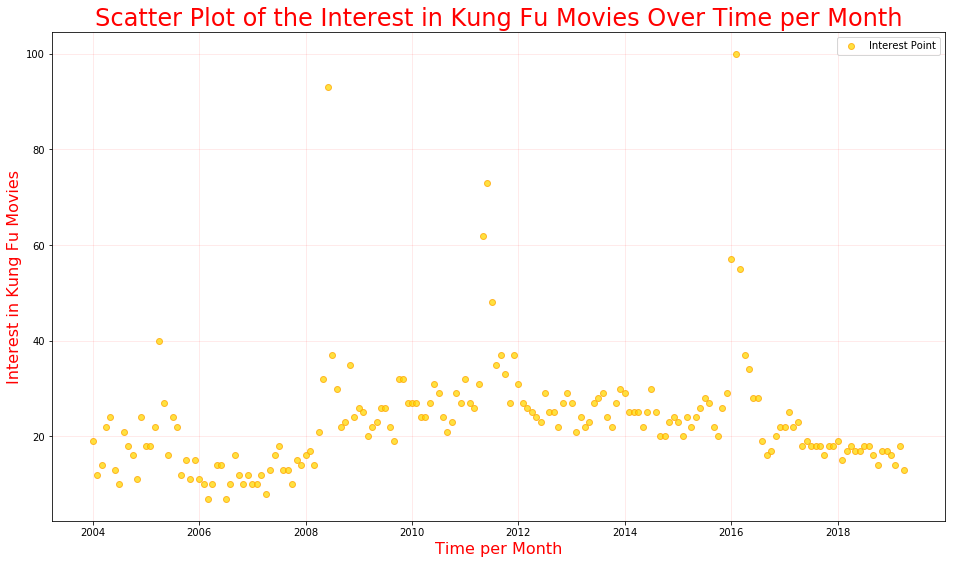

In [588]:
graph4A_scatter()

In [591]:
def graph4A_line():
    # copy over clean df to new one
    dfKF1 = get_clean_dfKF()

    indxlbl = dfKF1.index[((dfKF1['month']==1) & (dfKF1['year']%2==0))]

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )
    
    plt.plot(
        range(len(dfKF1['Date'])),
        dfKF['interest'],
        color=colors4[2],
        label='Interest',
        alpha=0.75,
        lw=3
    )

    ax.set_xlabel(
        "Year",
        fontsize=16,
        color=colors4[1]
    )
    
    ax.set_xticks(indxlbl)
    
    ax.set_xticklabels(dfKF1.loc[indxlbl, 'year'])

    ax.set_ylabel(
        "Interest in Kung Fu Movies",
        fontsize=16,
        color=colors4[1]
    )

    ax.set_title(
        "Scatter Plot of the Interest in Kung Fu Movies Over Time",
        fontsize=24,
        color=colors4[1]
    )
    
    ax.grid(
        alpha=0.1,
        color=colors4[1]
    )
    
    ax.set_axisbelow(
        True
    )

    plt.legend()
    plt.show()

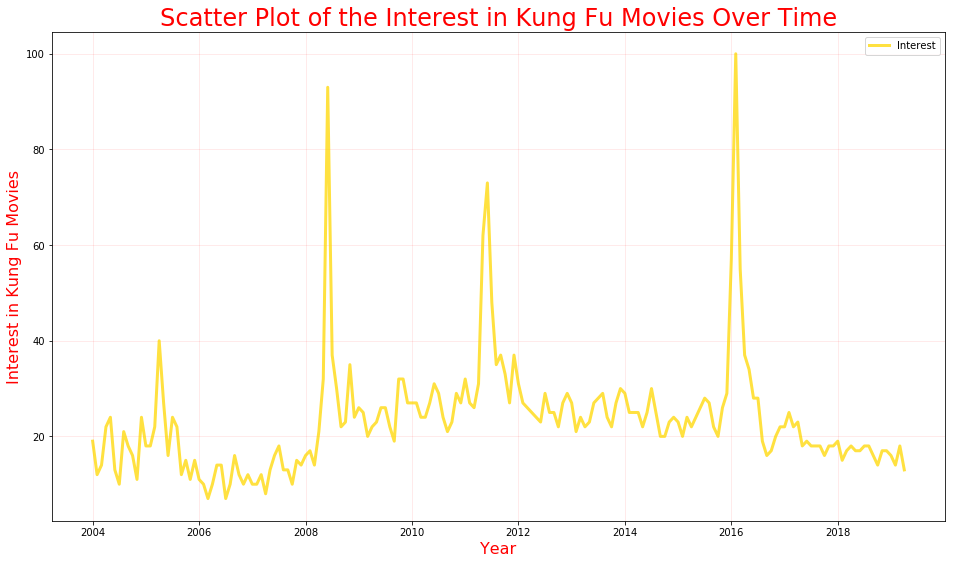

In [592]:
graph4A_line()

**Part B:** Based on your figure from Part A, formulate a hypothesis regarding whether or not a statistically significant linear trend exists. Clearly state your null and alternative hypotheses, and the level of significance you will use for this hypothesis test. If you have reason to believe some kind of a trend that is *not linear* exists, say so.

#### 4.B.
The only trend that I would think exists is whenever a popular movie comes out a lot of people search. For example, in June 2008 the point was extremely high. The hit film Kung Fu Panda came out that month. With this I can formulate my hypothesis. Based on this, I will propose that the level of interest in Kung Fu Movies since 2004 has increased.

* Null Hypothesis, $H_0$: There exists no change in Kung Fu Movie interest from 2004 to 2019. The interest is equal to 20.
* Alterrnative Hypothesis, $H_a$: There did exist a change in Kung Fu Movie Interest from 2004 to 2019. We will say for the better. That the interest is greater than 17. 

$$
H_0: \mu = 17\\
H_a: \mu > 17\\
$$

In [605]:
def B4func():
    # copy over clean df to new one
    dfKF1 = get_clean_dfKF()
    
    dfKF1.drop(
        columns=['Date'],
        inplace=True
    )
    
    dfKF1.drop(
        columns=['month'],
        inplace=True
    )
    
    dfKF1=dfKF1.groupby('year').mean()
    
    dfKF1.to_csv(r'A4func.csv')
    
    kfdf = 'A4func.csv'

    dfKF1 = pd.read_csv(
        kfdf,
        header=None,
        skiprows=1,
        names=['year', 'interest']
    )
    
    return(dfKF1)

In [628]:
B4func().head()

,year,interest
0,2004,17.000000
1,2005,20.000000
2,2006,11.083333
3,2007,12.666667
4,2008,30.333333


In [606]:
def graph4B_scatter_regress():
    # copy over clean df to new one
    dfKF1 = ABfunc()
    
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )

    plt.scatter(
        dfKF1['year'],
        dfKF1['interest'],
        color=colors4[2],
        edgecolors=colors4[0],
        s=100,
        alpha=0.75,
        label='Interest Point'
    )
    
    # Linear Regress
    bhat, ahat, rval, pval, stderr = stats.linregress(dfKF1['year'], dfKF1['interest'])
    
    print("bhat: {}".format(bhat))
    print("ahat: {}".format(ahat))
    print("rval: {}".format(rval))
    print("pval: {}".format(pval))    
    print("stderr: {}".format(stderr))
    
    ax.plot(
        dfKF1['year'],
        ahat+bhat*dfKF1['year'],
        color=colors4[1],
        lw=3,
        label='Linregress',
        ls='-'
    )
    
    ax.set_xlabel(
        "Year",
        fontsize=16,
        color=colors4[1]
    )
        
    ax.set_ylabel(
        "Interest in Kung Fu Movies",
        fontsize=16,
        color=colors4[1]
    )

    ax.set_title(
        "Scatter Plot of the Interest in Kung Fu Movies Per Year",
        fontsize=24,
        color=colors4[1]
    )
    
    ax.grid(
        alpha=0.1,
        color=colors4[1]
    )
    
    ax.set_axisbelow(
        True
    )

    plt.legend()
    plt.show()

bhat: 0.2606617647058824
ahat: -501.2534313725492
rval: 0.15885590636276956
pval: 0.5567798286449523
stderr: 0.4329720537619642


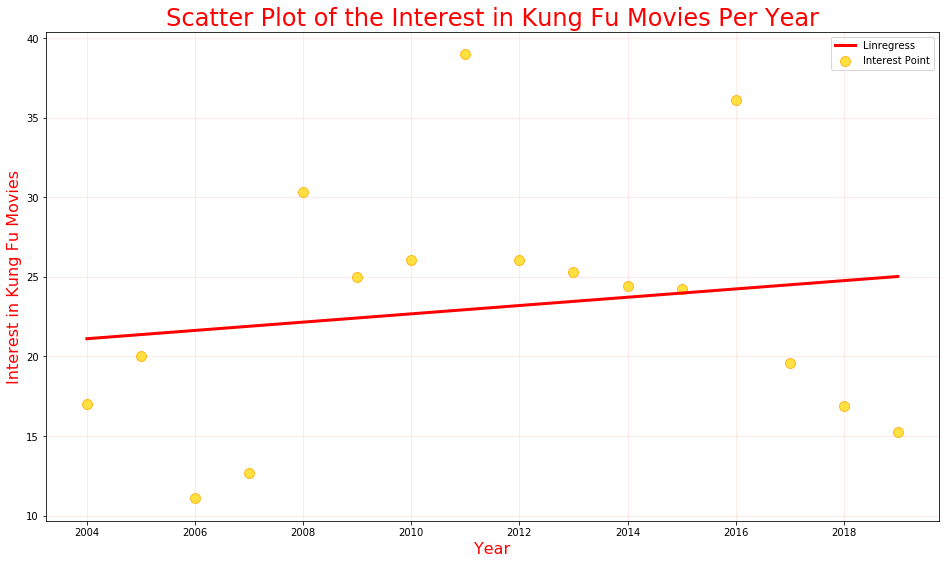

In [607]:
graph4A_scatter_regress()

**Part C:** Perform any processing that you need to do in order to satisfy the assumptions of the simple linear regression model. If you do not do any processing, then explain why you believe your data set already satisfies these assumptions (and clearly state the assumptions).

In [608]:
def C4R2():
    # confidence
    conf=0.66
    print('conf: {:0.03f}'.format(conf)) if (verbose) else None
    
    # alpha
    alpha=1-conf
    print('alpha: {:0.03f}'.format(alpha)) if (verbose) else None
    
    # get the new data frame
    dfKF1 = B4func()
    
    # Linear Regress
    bhat, ahat, rval, pval, stderr = stats.linregress(dfKF1['year'], dfKF1['interest'])
    if(verbose):
        print("bhat: {:0.03f}".format(bhat))
        print("ahat: {:0.03f}".format(ahat))
        print("rval: {:0.03f}".format(rval))
        print("pval: {:0.03f}".format(pval))    
        print("stderr: {:0.03f}".format(stderr))
        
    x=dfKF1['year']
    xmean=x.mean()
    y=dfKF1['interest']
    ymean=y.mean()
    
    # calculate ybar
    ybar=ahat+bhat*x
    
    ns=len(ybar)
    print('ns: {:0.03f}'.format(ns)) if (verbose) else None
    
    tcrit = stats.t.ppf(1-alpha/2, df= (ns-2))
    print('tcrit: {:0.03f}'.format(tcrit)) if (verbose) else None
    
    SSE=np.sum((y-ybar)**2)
    print('SSE: {:0.03f}'.format(SSE)) if (verbose) else None
    SSX=np.sum((x-xmean)**2)
    print('SSX: {:0.03f}'.format(SSX)) if (verbose) else None
    SST=np.sum((y-ymean)**2)
    print('SST: {:0.03f}'.format(SST)) if (verbose) else None
    
    R2=1-(SSE/SST)
    print('R2: {:0.03f}'.format(R2)) if (verbose) else None
    
    return R2

In [611]:
def graph4C_Res():
    # copy over clean df to new one
    dfKF1 = B4func()
    
    # get the x and y values from the df
    x=dfKF1['year']
    y=dfKF1['interest']
    
    # get the regression value
    R2=C4R2()
    
    # Linear Regress
    bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
    
    # calculate ybar
    yhat=ahat+bhat*x
    
    # calculate res
    res=y-yhat
    
    # plots
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )
    
    # do the first scatter plot of the res
    plt.scatter(
        x,
        res,
        color=colors4[2],
        edgecolors=colors4[0],
        s=100,
        alpha=0.75,
        label='Interest Point'
    )
    
    ax.set_xlabel(
        "Year",
        fontsize=16,
        color=colors4[1]
    )
        
    ax.set_ylabel(
        "Residual Interest of Kung Fu Movies",
        fontsize=16,
        color=colors4[1]
    )

    ax.set_title(
        "Scatter Plot of Residual Interest of Kung Fu Movies Per Year",
        fontsize=24,
        color=colors4[1]
    )
    
    ax.grid(
        alpha=0.1,
        color=colors4[1]
    )
    
    ax.set_axisbelow(
        True
    )
    
    plt.legend()
    plt.show()

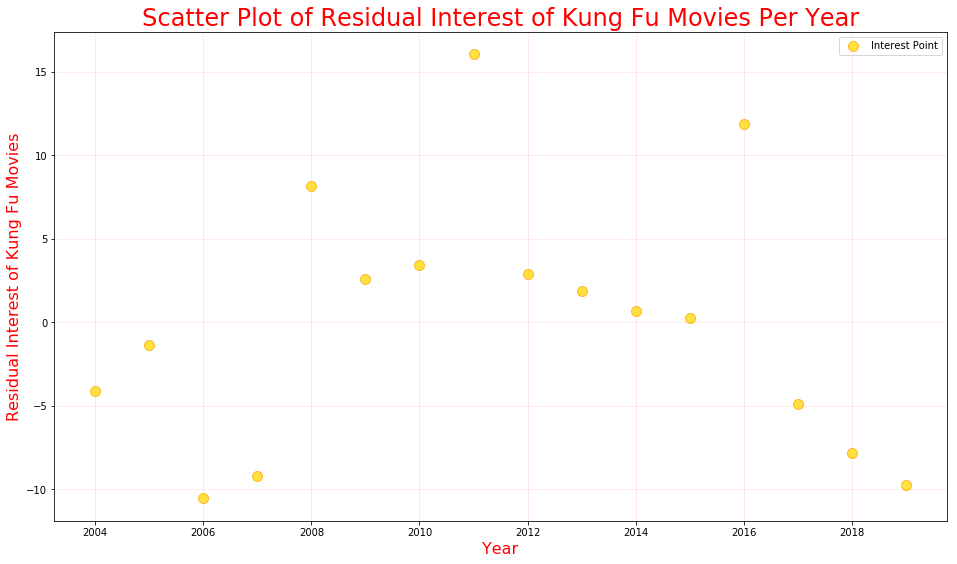

In [612]:
graph4C_Res()

**Part D:** Compute **by hand** the p-value associated with the hypothesis test from Part B. Clearly state your conclusion. You may use `scipy.stats.linregress` to check your answer, and you may use Python as a calculator (and to get critical values, for example), but you need to show all your work by hand.

#### 4.D.
Doing a p-value test

* Null Hypothesis, $H_0$: There exists no change in Kung Fu Movie interest from 2004 to 2019. The interest is equal to 20.
* Alterrnative Hypothesis, $H_a$: There did exist a change in Kung Fu Movie Interest from 2004 to 2019. We will say for the better. That the interest is greater than 17. 

$$
H_0: \mu = 17\\
H_a: \mu \gt 17\\
$$

Let:
* $\alpha = 0.05$
* $n = 16$
* $\bar{x} = 23.068$
* $\sigma = 7.812$

What we want to find:
* $p \left( \bar{x} \ge 23.068 \mid H_0 \text{ true} \right)$

If:
* $p \lt \alpha \rightarrow \text{Reject the null hypothesis}$
* $p \gt \alpha \rightarrow \text{Do not reject the null hypothesis}$

$$
T = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}\\
T = \frac{23.068 - 17}{\frac{7.812}{\sqrt{16}}}\\
T = 3.420378904249872
$$

In [676]:
def calc4D():
    a=0.05
    
    # calculate the tvalue
    tval=(23.68-17)/(7.812/(16)**(1/2))
    print('tval: {:0.3f}'.format(tval))
    
    # Find the talpha value
    talp=stats.t.ppf(
        q=a,
        df=16
    )
    
    # find the p value
    pval = stats.t.cdf(
        tval,
        16
    )
    
    print('pval: {:0.3f}'.format(pval))
    print('talp: {:0.3f}'.format(talp))
    print("Do Not Reject Null Hypothesis") if(pval > talp) else print("Reject Null Hypothesis") 

In [677]:
calc4D()

tval: 3.420
pval: 0.998
talp: -1.746
Do Not Reject Null Hypothesis


In [653]:
def func4D():
    # copy over clean df to new one
    dfKF1 = B4func()
    
    # get the x and y values from the df
    x=dfKF1['year']
    y=dfKF1['interest']
    
    # get the mean interest
    ymean=y.mean()
    print('ymean: {:0.03f}'.format(ymean)) if (verbose) else None
    
    # length of y
    ns=len(y)
    print('n samples: {:0.03f}'.format(ns)) if (verbose) else None
    
    # standard deviation
    sigma=y.std()
    print('sigma: {:0.03f}'.format(sigma)) if (verbose) else None
    
    # Linear Regress vals
    bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
    if(verbose):
        print("bhat: {:0.03f}".format(bhat))
        print("ahat: {:0.03f}".format(ahat))
        print("rval: {:0.03f}".format(rval))
        print("pval: {:0.03f}".format(pval))
        print("stderr: {:0.03f}".format(stderr))

In [648]:
verbose=True
func4D()

ymean: 23.068
n samples: 16.000
sigma: 7.812
bhat: 0.261
ahat: -501.253
rval: 0.159
pval: 0.557
stderr: 0.433


So we can say with 95% confidence that there has not been an increase in kung fu movie interest in the since 2004.